<a href="https://colab.research.google.com/github/purvadanait/AIML-Pract/blob/main/NNwFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import numpy as np

In [2]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)

print('Test: X = ', testX.shape)

4431872/4422102 [==============================] - 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


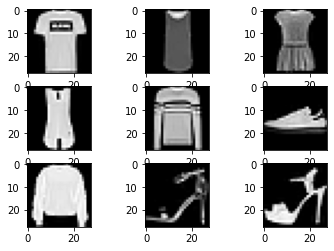

In [3]:
for i in range(1, 10):

    plt.subplot(3, 3, i)

    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
trainX = np.expand_dims(trainX, -1)

testX = np.expand_dims(testX, -1)

print(trainX.shape)

(60000, 28, 28, 1)


In [5]:
def model_arch():

    models = Sequential()


    models.add(Conv2D(64, (5, 5),

                      padding="same",

                      activation="relu", 

                      input_shape=(28, 28, 1)))


    models.add(MaxPooling2D(pool_size=(2, 2)))

    models.add(Conv2D(128, (5, 5), padding="same",

                      activation="relu"))

     

    models.add(MaxPooling2D(pool_size=(2, 2)))

    models.add(Conv2D(256, (5, 5), padding="same", 

                      activation="relu"))

     

    models.add(MaxPooling2D(pool_size=(2, 2)))


    models.add(Flatten())

    models.add(Dense(256, activation="relu"))


    models.add(Dense(10, activation="softmax"))

    return models

In [6]:
model = model_arch()
 

model.compile(optimizer=Adam(learning_rate=1e-3),

              loss='sparse_categorical_crossentropy',

              metrics=['sparse_categorical_accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 256)        0

In [7]:
history = model.fit(

    trainX.astype(np.float32), trainy.astype(np.float32),

    epochs=10,

    steps_per_epoch=10,

    validation_split=0.33
)

Epoch 1/10
10/10 [==============================] - 28s 1s/step - loss: 35.0316 - sparse_categorical_accuracy: 0.1243 - val_loss: 2.4722 - val_sparse_categorical_accuracy: 0.1157
Epoch 2/10
10/10 [==============================] - 5s 546ms/step - loss: 2.2309 - sparse_categorical_accuracy: 0.1953 - val_loss: 1.9713 - val_sparse_categorical_accuracy: 0.2647
Epoch 3/10
10/10 [==============================] - 5s 549ms/step - loss: 1.6794 - sparse_categorical_accuracy: 0.4056 - val_loss: 1.3760 - val_sparse_categorical_accuracy: 0.5231
Epoch 4/10
10/10 [==============================] - 5s 549ms/step - loss: 1.1721 - sparse_categorical_accuracy: 0.5962 - val_loss: 0.9445 - val_sparse_categorical_accuracy: 0.6416
Epoch 5/10
10/10 [==============================] - 6s 644ms/step - loss: 0.7833 - sparse_categorical_accuracy: 0.7151 - val_loss: 0.6620 - val_sparse_categorical_accuracy: 0.7545
Epoch 6/10
10/10 [==============================] - 5s 551ms/step - loss: 0.6037 - sparse_categorical

In [8]:
model.save_weights('./model.h5', overwrite=True)

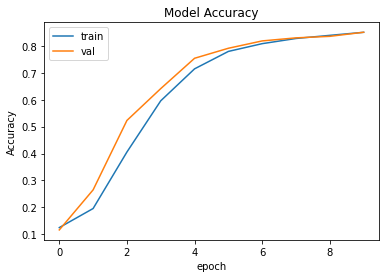

In [9]:
plt.plot(history.history['sparse_categorical_accuracy'])

plt.plot(history.history['val_sparse_categorical_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')
plt.show()

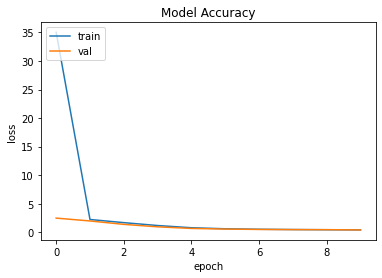

In [10]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('Model Accuracy')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')
plt.show()

Enter a number between 0 to 9999 200
score =  0.9985777
label =  trouser


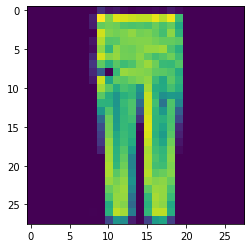

In [13]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

#testX[1].shape
#testX[1].shape
#print(testX[:66].shape)

class_id = int(input("Enter a number between 0 to 9999")) # the number of classes between 0 & 9999 (for test dataset)

predictions = model.predict(testX[class_id:class_id+1])
#print(predictions.shape)
#predictions

label = labels[np.argmax(predictions[:])] # find the max value at the index and then look up the value (0-9) in the labels section
score = np.max(predictions[:])
print("score = ", score) 
print("label = ", label)

plt.imshow(np.squeeze(testX[class_id]))
plt.show()